<a href="https://colab.research.google.com/github/Harshit1203/Neural-Networks/blob/master/ConvNet_Fashion_Mniset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fashion_mnist = tf.keras.datasets.fashion_mnist

training size: (60000, 28, 28)


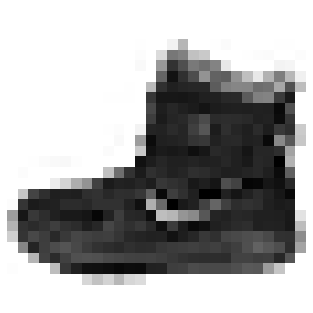

In [10]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(f'training size: {training_images.shape}')
plt.imshow(training_images[0], interpolation='nearest', cmap='binary')
plt.grid(False)
plt.axis('off');

In [11]:
X_train, X_test = training_images/255.0, test_images/255.0
X_train,X_test = X_train.reshape(60000,28,28,1), X_test.reshape(10000, 28,28,1)

In [12]:
model = tf.keras.models.Sequential([
                      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
                      tf.keras.layers.MaxPooling2D((2,2)),
                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                      tf.keras.layers.MaxPooling2D((3,3)),
                      tf.keras.layers.Flatten(),
                      tf.keras.layers.Dense(128, activation='relu'),
                      tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, training_labels, epochs=20, verbose=2, validation_split=0.1, batch_size=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               73856     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
model_loss, model_acc = model.evaluate(X_test, test_labels, verbose=2)
print(model_acc)

313/313 - 1s - loss: 0.3370 - accuracy: 0.9032
0.9031999707221985


In [14]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


Convolution Layer : 64
Convolution Layer : 64
Convolution Layer : 64
Convolution Layer : 64


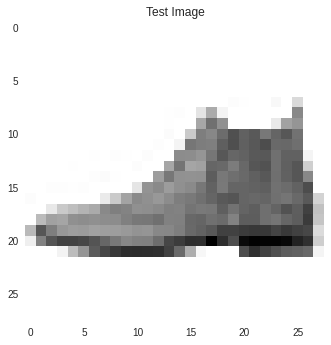

<Figure size 576x396 with 0 Axes>

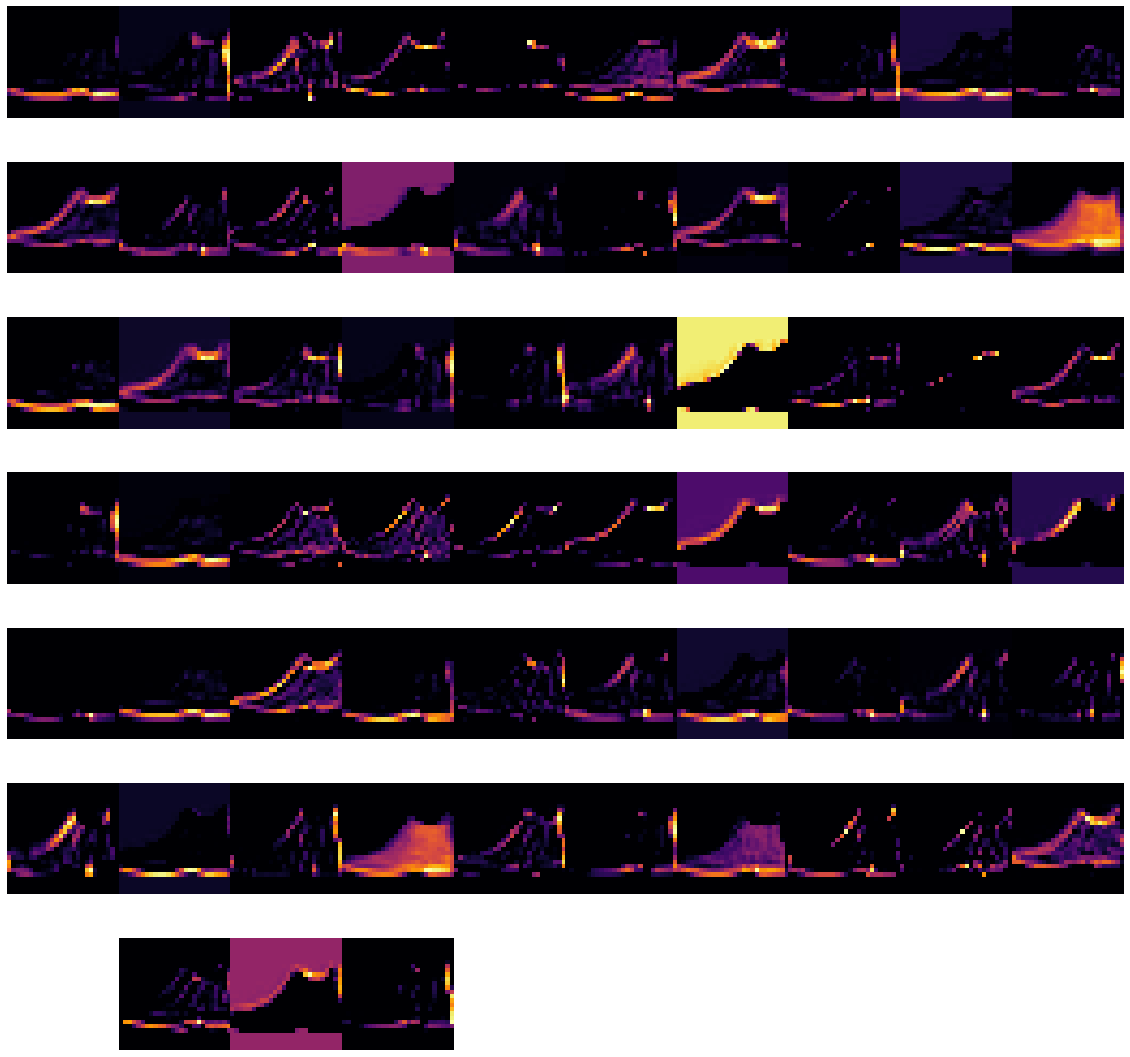

<Figure size 576x396 with 0 Axes>

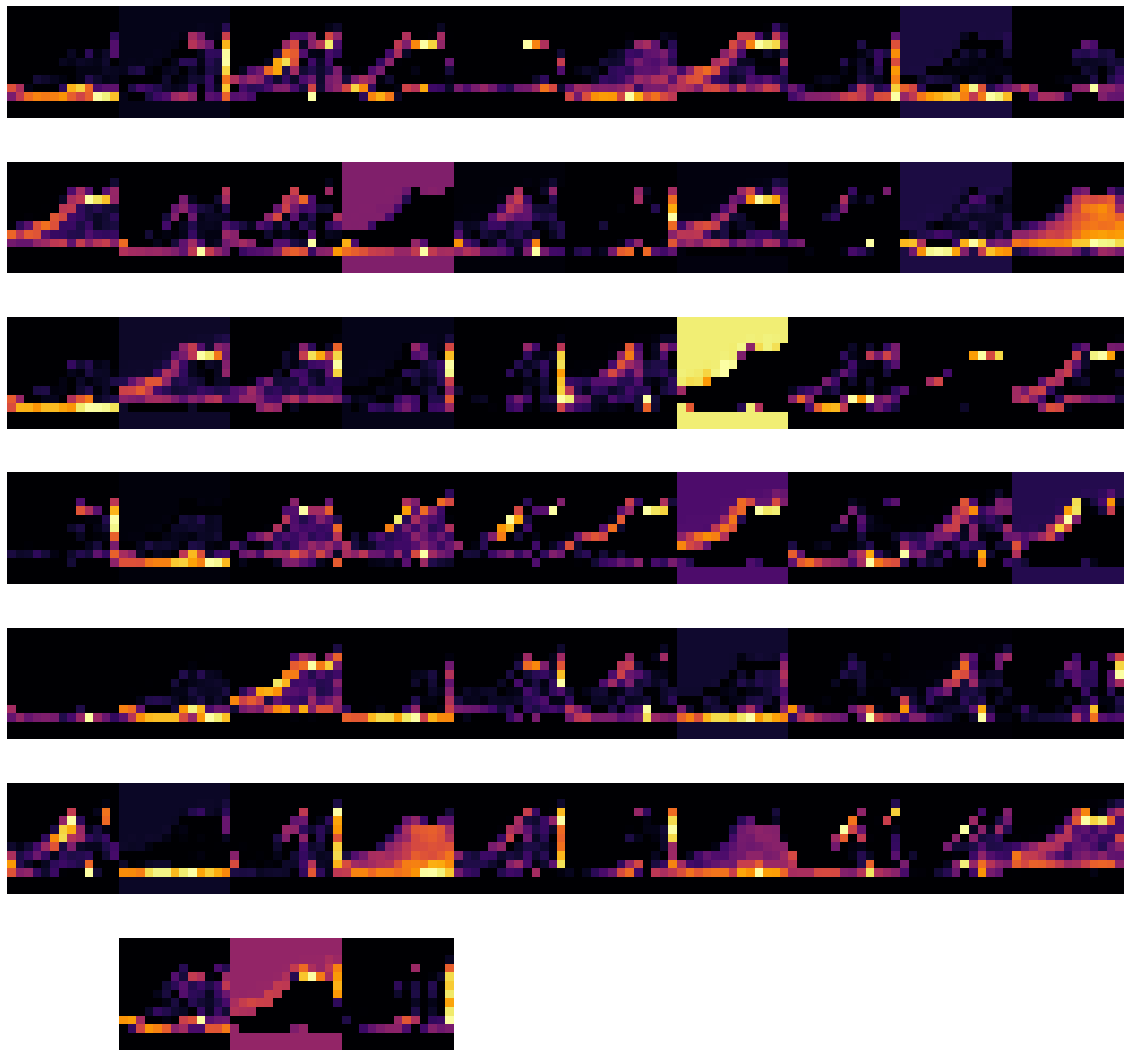

<Figure size 576x396 with 0 Axes>

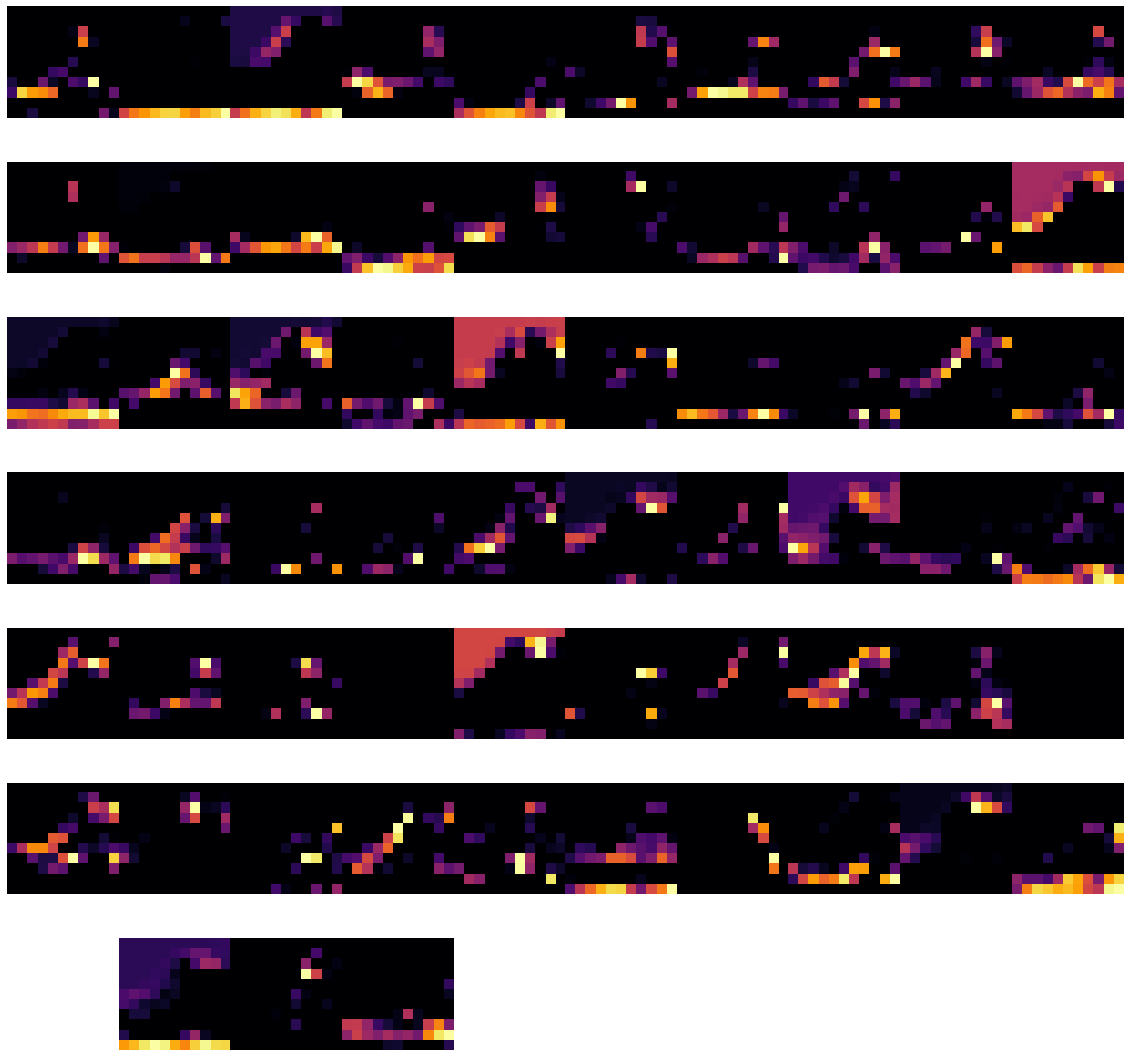

<Figure size 576x396 with 0 Axes>

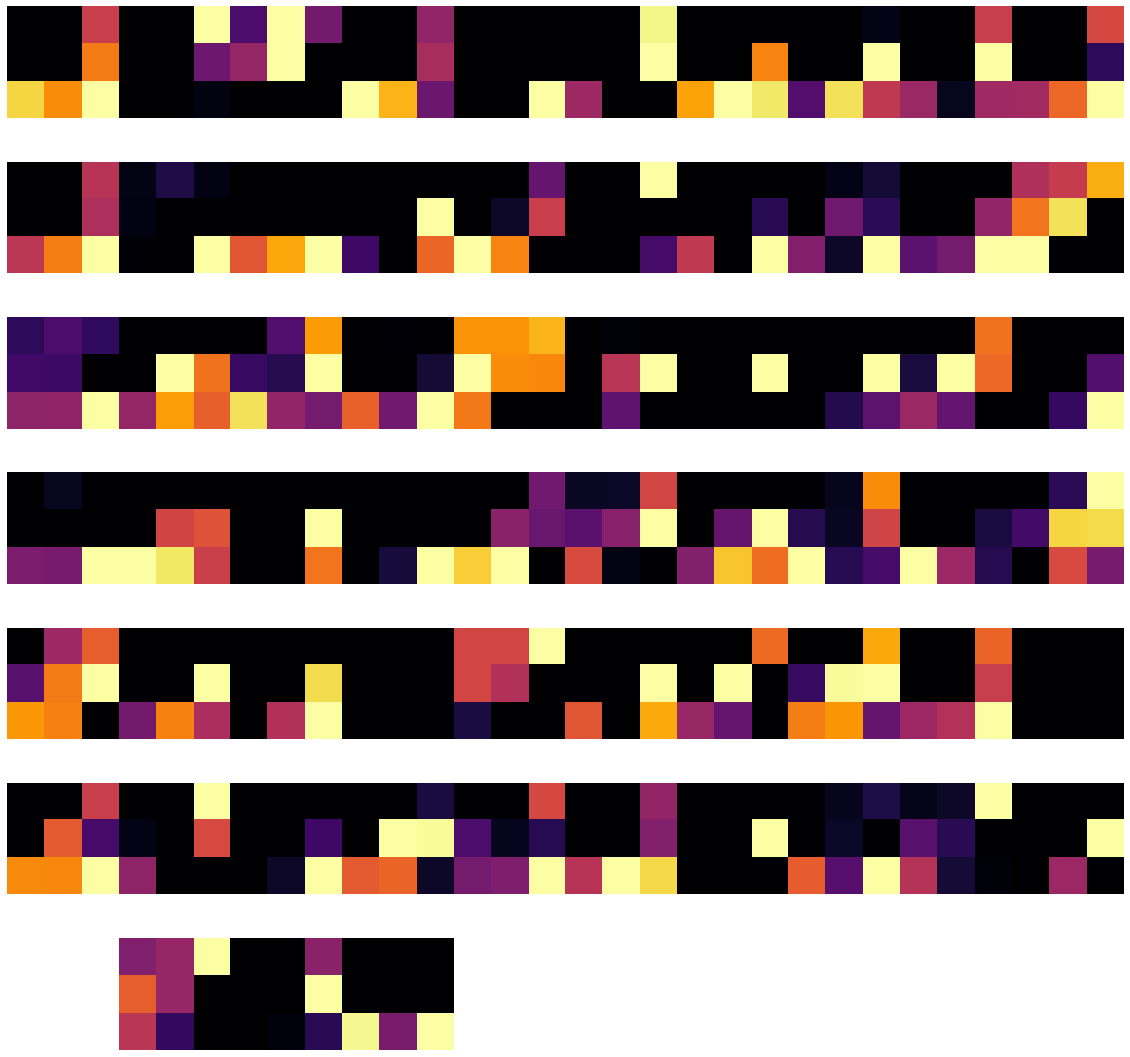

In [15]:
plt.style.use('seaborn')

image = 0
fig2 = plt.figure(11)
plt.imshow(X_test[image].reshape(28,28), interpolation='nearest',  cmap='binary')
plt.grid(False)
plt.title('Test Image')


layer_output = [layers.output for layers in model.layers]
actiavtion_model = tf.keras.models.Model(outputs = layer_output, inputs = model.input)

f = []
for layer in range(0,4):
  f.append(actiavtion_model.predict(X_test[image].reshape(1,28,28,1))[layer])

n_C = [64,64,64,64] # number of Convolution Filters And Pooling Filters in different layers

for k in range(0,len(n_C)):
  print(f'Convolution Layer : {n_C[k]}')
  fig = plt.figure(k)
  n_rows = n_C[k]//10 + 1
  fig, ax  = plt.subplots(n_rows,10, figsize=(20,20),gridspec_kw={'wspace':0, 'hspace':0}) 
  j=0

  for i in range(0,n_C[k]):
    if i % 10 == 0 and i != 0:
      j += 1
    ax[j,i%10].imshow(f[k][0,:,:,i], cmap='inferno')
    ax[j,i%10].axis('off')
    ax[j,i%10].grid(False)
    if i == n_C[k]-1:
      j = 0

  for l in range(n_C[k], n_rows*10+1):
    ax[n_rows-1, l%10].set_visible(False)

